<a href="https://colab.research.google.com/github/cam2149/FundamentosIA/blob/main/Examen1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial Aplicada

## Aprendizaje Automatico 1

## Examen 1

### Integrantes

- Yesid Castelblanco
- Andres Felipe Borrero
- Carlos Alberto Martinez Ramirez
- Nicolas Colmenares

### **Profesores**

- Santiago Ortiz
- Henry Velasco

Fecha: _ de 2024

# Ejercicio 1

## Datos

Considere el conjunto de datos “data1” del fichero data_exam1.xls

### Puntos

1. Realice un análisis exploratorio de datos ¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y? Justifique. Si la
respuesta a la pregunta es SI, genere un modelo de regresión sin interacción e interpretelo.

2. Realice un gráfico de dispersión para Y vs X, considerando para cada observación su respectivo valor en la variable Ind. ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X? ¿Considera que un modelo con
interacciones sería más adecuado? Si la respuesta a estas preguntas es afirmativa, genere el
respectivo modelo, interprete detalladamente los resultados y valide los supuestos del modelo propuesto

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [40]:
url = 'https://github.com/cam2149/MachinelearningI/raw/85795f6469ebde1f693b7cb6c893c10135408974/data_exam1.xlsx'

df=pd.read_excel(url, sheet_name='data1')

##Ejercicio 1_1

##Análisis explotatorio de datos

In [41]:
df

,Y,X,Ind
0,66.199147,12.653765,0
1,44.311301,8.204418,0
2,48.390783,8.768596,0
3,58.087413,16.169568,1
4,60.708671,9.980310,0
...,...,...,...
995,54.191565,6.769546,0
996,37.481140,9.297337,1
997,26.864547,9.391452,0
998,100.950444,17.370262,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
 2   Ind     1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [43]:
df.describe()

,Y,X,Ind
count,1000.000000,1000.000000,1000.0000
mean,46.953751,9.976858,0.2000
std,22.046143,3.762567,0.4002
min,-34.894319,-4.263757,0.0000
25%,32.427643,7.638899,0.0000
50%,45.460252,9.952888,0.0000
75%,61.587567,12.379984,0.0000
max,135.542574,25.628678,1.0000


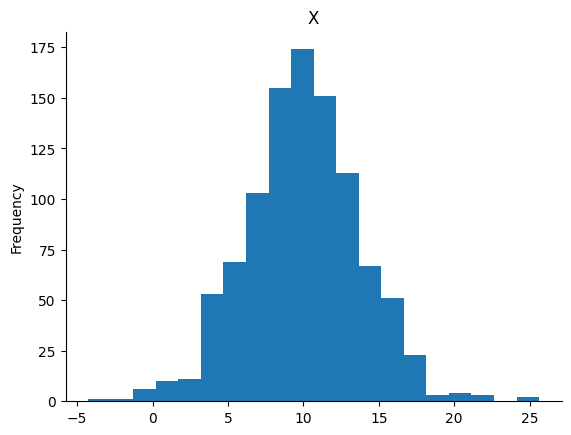

In [44]:
# @title X

from matplotlib import pyplot as plt
df['X'].plot(kind='hist', bins=20, title='X')
plt.gca().spines[['top', 'right',]].set_visible(False)

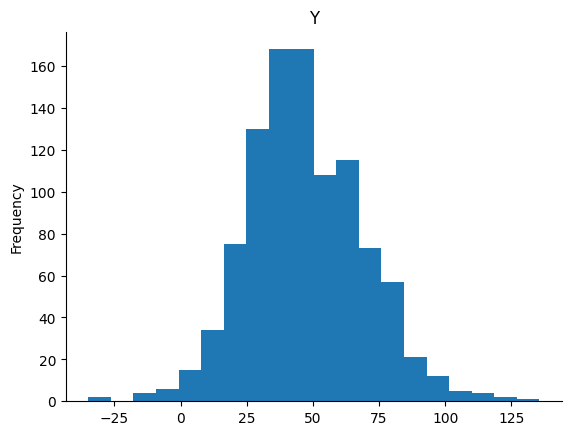

In [45]:
# @title Y

from matplotlib import pyplot as plt
df['Y'].plot(kind='hist', bins=20, title='Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

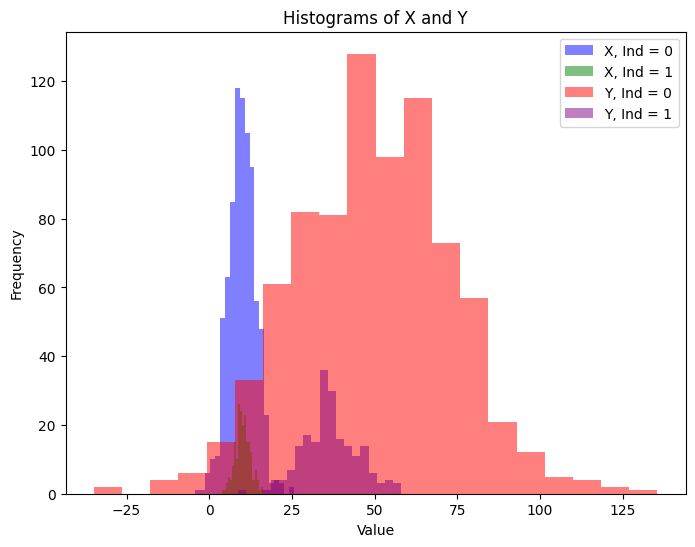

In [46]:
# @title Histograms of X and Y

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df[df['Ind'] == 0]['X'], bins=20, alpha=0.5, label='X, Ind = 0', color='blue')
plt.hist(df[df['Ind'] == 1]['X'], bins=20, alpha=0.5, label='X, Ind = 1', color='green')
plt.hist(df[df['Ind'] == 0]['Y'], bins=20, alpha=0.5, label='Y, Ind = 0', color='red')
plt.hist(df[df['Ind'] == 1]['Y'], bins=20, alpha=0.5, label='Y, Ind = 1', color='purple')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of X and Y')
_ = plt.legend()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


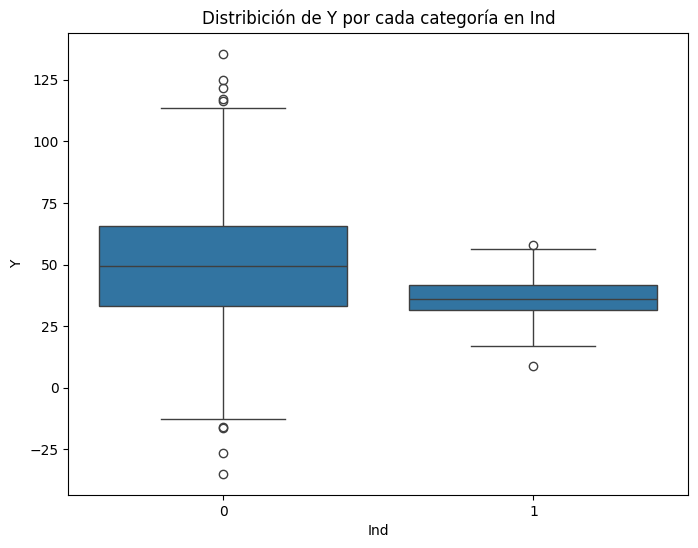

In [47]:
# @title Distribución de 'Y' por cada categoría de Ind

plt.figure(figsize=(8, 6))
sns.boxplot(x='Ind', y='Y', data=df)
plt.title('Distribición de Y por cada categoría en Ind')
plt.show()

El diagrama de caja indica que la distribución de Y podría ser diferente para cada categoría de Ind.

In [48]:
# @title Matriz de correlación
correlation_matrix = df.corr()
print(correlation_matrix)


            Y         X       Ind
Y    1.000000  0.832057 -0.237224
X    0.832057  1.000000  0.024069
Ind -0.237224  0.024069  1.000000


Text(0, 0.5, 'Y')

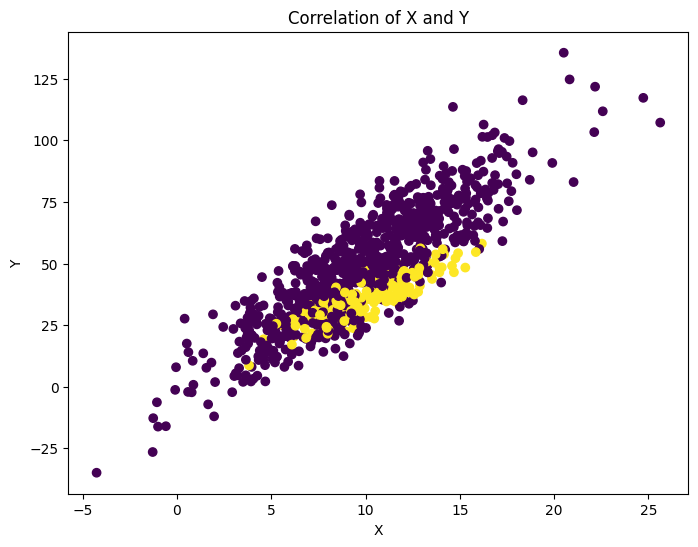

In [49]:
# @title Correlación entre 'X' y 'Y'

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], c=df['Ind'], cmap='viridis')
plt.title('Correlation of X and Y')
plt.xlabel('X')
plt.ylabel('Y')



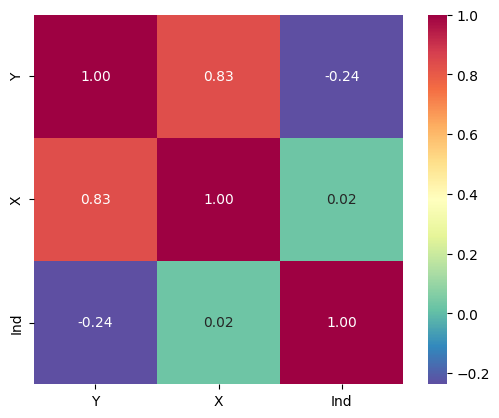

In [50]:
# Correlacion entre variables
numeric_df = df.select_dtypes(include=['number'])
corrmat = numeric_df.corr()

hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=numeric_df.columns,
                 xticklabels=numeric_df.columns,
                 cmap="Spectral_r")
plt.show()

La matriz de correlación muestra la correlación entre X e Y y las correlaciones entre las variables y la variable dependiente Y.

In [51]:
# @title Estadistica Descriptiva del Dataframe
df.describe()

,Y,X,Ind
count,1000.000000,1000.000000,1000.0000
mean,46.953751,9.976858,0.2000
std,22.046143,3.762567,0.4002
min,-34.894319,-4.263757,0.0000
25%,32.427643,7.638899,0.0000
50%,45.460252,9.952888,0.0000
75%,61.587567,12.379984,0.0000
max,135.542574,25.628678,1.0000


En respuesta a la pregunta **¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y? **
Basado en el análisis exploratorio de datos, el diagrama de dispersión muestra una posible dependiencia entre X e Y, se identifica una dependencia de tipo relacion directa (directamente proporcional). Se evidencia cierta correlación entre X e Y y sin interacción de la variable categorica Ind, lo que parece posible construir un modelo de regresión.
Podemos generar un modelo para predecir Y utilizando X e Ind.

In [52]:
# @title Modelo de regresión lineal con variable categórica Ind sin interacción para la variable
#Modelo de regresión lineal con variable categórica Ind sin interacción para la variable Y
# Importar librerías necesarias
import statsmodels.formula.api as sm
# Generar el modelo de regresión lineal con variable categórica Ind sin interacción
model = sm.ols('Y ~ X + C(Ind)', data=df).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1566.
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          2.25e-308
Time:                        02:34:42   Log-Likelihood:                -3801.1
No. Observations:                1000   AIC:                             7608.
Df Residuals:                     997   BIC:                             7623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7873      0.984      0.800      

##Ejercicio 1_2

Realice un gráfico de dispersión para Y vs X, considerando para cada observación su respectivo valor en la variable Ind.

*  ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a
incrementos unitarios de X?
*   ¿Considera que un modelo con interacciones sería más adecuado?

 Si la respuesta a estas preguntas es afirmativa, genere el respectivo modelo, interprete detalladamente los resultados y valide los supuestos del modelo propuesto

<Figure size 1000x800 with 0 Axes>

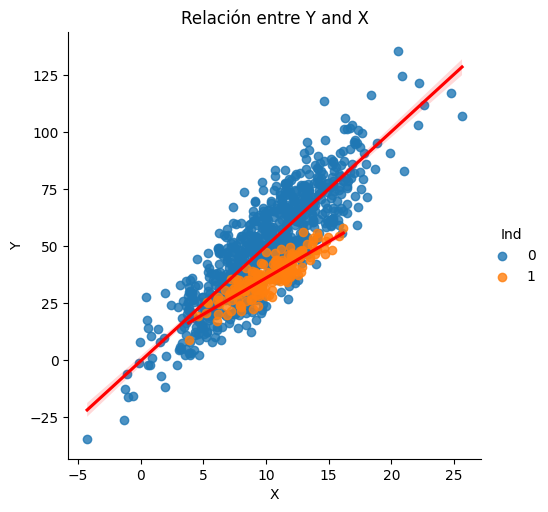

In [53]:
# @title Dispersión Y vs X
from matplotlib import pyplot as plt
# Analyze the relationship between Y and X
plt.figure(figsize=(10, 8))
# sns.scatterplot(x='X', y='Y', hue='Ind', data=df)
sns.lmplot(x='X', y='Y', hue='Ind', data=df, line_kws={'color': 'red'})
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Relación entre Y and X')
plt.show()



¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X?

In [ ]:
# prompt: Segun el dataset anterior y el analisis exploratorio realizado responde la pregunta ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X? en español, y explica paso a paso la respuesta

# Respuesta a la pregunta: ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X?

# Sí, hay evidencia muestral que sugiere un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X.
# Esto se puede observar en el gráfico de dispersión entre Y y X, donde se distinguen dos patrones de dispersión dependiendo del valor de la variable 'Ind'.
#
# **Explicación paso a paso:**
#
# 1. **Gráfico de dispersión:** El gráfico de dispersión Y vs X, con colores diferentes para cada valor de 'Ind', nos permite visualizar la relación entre estas variables para cada grupo definido por 'Ind'.
#
# 2. **Comparación de pendientes:** Al observar las nubes de puntos para cada valor de 'Ind', podemos apreciar que las pendientes de las relaciones entre Y y X parecen diferentes para cada grupo.
#
# 3. **Cambio en la tasa media de cambio:** Un cambio en la pendiente indica que la tasa media de cambio de Y con respecto a X no es constante para ambos grupos.  En otras palabras, para un mismo incremento unitario en X, el incremento en Y no es el mismo para las observaciones con 'Ind' igual a 0 que para las observaciones con 'Ind' igual a 1.
#
# 4. **Interpretación:** Esto significa que la variable 'Ind' está influyendo en la relación entre Y y X, y la interacción entre 'X' e 'Ind' podría ser relevante para modelar la variable 'Y'.
#
# **En conclusión:** La evidencia gráfica sugiere que la tasa media de cambio de Y con respecto a X no es constante para todos los valores de 'Ind'. Por lo tanto, se puede afirmar que hay evidencia muestral que sugiere un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X.


In [ ]:
# prompt: ¿Considera que un modelo con interacciones sería más adecuado? en español, y explica paso a paso la respuesta

# ¿Considera que un modelo con interacciones sería más adecuado?

# Respuesta: Sí, considerando la evidencia muestral observada en el gráfico de dispersión, un modelo con interacciones entre X e Ind sería más adecuado para modelar la variable Y.

# Explicación paso a paso:

# 1. Evidencia gráfica:
#    - El gráfico de dispersión Y vs X, con colores diferentes para cada valor de 'Ind', muestra claramente que la relación entre Y y X no es la misma para cada grupo definido por 'Ind'.
#    - Se observa que la pendiente de la relación lineal entre Y y X cambia dependiendo del valor de 'Ind'. Esto indica que la variable 'Ind' influye en la forma en que X afecta a Y.

# 2. Interpretación de la interacción:
#    - Una interacción entre X e Ind significa que el efecto de X sobre Y depende del valor de Ind.
#    - En este caso, la interacción representaría cómo el efecto de X sobre Y es diferente para las observaciones con Ind = 0 y para las observaciones con Ind = 1.

# 3. Modelo sin interacción vs. modelo con interacción:
#    - Un modelo de regresión lineal sin interacción asume que el efecto de X sobre Y es constante independientemente del valor de Ind.
#    - En cambio, un modelo con interacción permite que el efecto de X sobre Y varíe según el valor de Ind.
#    - Dado que la evidencia gráfica sugiere que el efecto de X sobre Y no es constante para todos los valores de Ind, un modelo con interacción sería más apropiado para capturar esta variabilidad en la relación entre las variables.

# 4. Mejora del ajuste del modelo:
#    - Al incluir la interacción entre X e Ind en el modelo, se puede mejorar la capacidad del modelo para predecir Y, ya que se está considerando la influencia de Ind en la relación entre X e Y.
#    - Un modelo con interacción captura mejor la complejidad de la relación entre las variables y, por lo tanto, puede proporcionar predicciones más precisas.

# En conclusión:
# - La evidencia gráfica del cambio en la pendiente de la relación entre Y y X según el valor de Ind sugiere que un modelo de regresión con interacción entre X e Ind sería más adecuado para representar la complejidad de la relación entre las variables.
# - Un modelo con interacción puede mejorar el ajuste y la precisión de las predicciones en comparación con un modelo sin interacción, que no captura la variabilidad en la relación entre Y y X según el valor de Ind.


In [54]:
# prompt: genera un modelo con interacciones para evidenciar la respuesta anterior

# Modelo de regresión lineal con interacción entre X e Ind
model_interaction = sm.ols('Y ~ X + C(Ind) + X:C(Ind)', data=df).fit()
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1081.
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          1.34e-312
Time:                        03:13:06   Log-Likelihood:                -3787.5
No. Observations:                1000   AIC:                             7583.
Df Residuals:                     996   BIC:                             7603.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.4991      1.001     -0.498

In [ ]:
# prompt: Interpreta la función 'Y ~ X + C(Ind) + X:C(Ind)' del modelo anterior y explicala paso a paso

# Interpretación de la función 'Y ~ X + C(Ind) + X:C(Ind)'

# La función describe un modelo de regresión lineal donde la variable dependiente (Y) se predice
# utilizando las variables independientes X e Ind, y su interacción.

# Paso a paso:

# 1. Y ~ : Indica que la variable Y es la que queremos predecir.
# 2. X: Representa la variable independiente X. En este caso, X tiene un efecto directo sobre Y.
# 3. C(Ind): Representa la variable categórica Ind, que es tratada como una variable dummy.
#    - El modelo creará un conjunto de variables dummy para cada categoría de Ind.
#    - Esto permite modelar el efecto de cada categoría de Ind sobre Y.
# 4. X:C(Ind): Representa la interacción entre X e Ind.
#    - Esta interacción permite que el efecto de X sobre Y sea diferente para cada categoría de Ind.
#    - En otras palabras, se permite que la pendiente de la relación lineal entre X e Y varíe según el
#      valor de Ind.

# En resumen:

# El modelo busca predecir la variable Y utilizando:
# - El efecto directo de X sobre Y.
# - El efecto directo de cada categoría de Ind sobre Y.
# - El efecto de la interacción entre X e Ind sobre Y, lo que permite que el efecto de X sobre Y sea
#   diferente para cada categoría de Ind.

# Ejemplo:

# Supongamos que Ind tiene dos categorías (0 y 1). La función del modelo se puede escribir como:

# Y = β0 + β1*X + β2*Ind0 + β3*Ind1 + β4*X*Ind0 + β5*X*Ind1

# Donde:
# - β0: Es la intersección del modelo.
# - β1: Es el efecto de X sobre Y cuando Ind es 0.
# - β2: Es el efecto de Ind0 sobre Y cuando X es 0.
# - β3: Es el efecto de Ind1 sobre Y cuando X es 0.
# - β4: Es el cambio en el efecto de X sobre Y cuando Ind es 0.
# - β5: Es el cambio en el efecto de X sobre Y cuando Ind es 1.

# Por lo tanto, la interacción permite modelar cómo el efecto de X sobre Y cambia según el valor de
# Ind, lo que ayuda a capturar la complejidad de la relación entre estas variables.


In [ ]:
# prompt: explica paso a paso 4 conclusiones del modelo anterior

# Conclusiones del modelo de regresión con interacción

# 1. Efecto de X sobre Y en cada grupo de Ind:
#    - El coeficiente de X (sin interacción) representa el efecto promedio de X sobre Y, sin considerar la variable Ind.
#    - El coeficiente de la interacción entre X e Ind (X:C(Ind)) representa el cambio en el efecto de X sobre Y para cada grupo de Ind (Ind=0 e Ind=1).
#    - Para comprender el efecto de X sobre Y en cada grupo, se deben sumar los coeficientes de X y la interacción correspondiente.
#    - Por ejemplo:
#      - Efecto de X en Ind=0: Coeficiente de X + Coeficiente de interacción para Ind=0.
#      - Efecto de X en Ind=1: Coeficiente de X + Coeficiente de interacción para Ind=1.
#
# 2. Importancia de la interacción:
#    - La significancia estadística del coeficiente de interacción (X:C(Ind)) indica la importancia de la interacción entre X e Ind en el modelo.
#    - Si el coeficiente de interacción es significativo, sugiere que el efecto de X sobre Y es diferente en los diferentes grupos de Ind.
#    - Esto confirma que un modelo con interacción es necesario para modelar la relación entre Y, X e Ind con precisión.
#
# 3. Interpretación del intercepto:
#    - El intercepto del modelo representa el valor esperado de Y cuando X e Ind son iguales a cero.
#    - En este caso, el intercepto proporciona el valor base de Y para el grupo con Ind=0 cuando X=0.
#    - Sin embargo, es importante recordar que la interpretación del intercepto puede no tener sentido en todos los casos, dependiendo del contexto y los datos.
#
# 4. Bondad del ajuste:
#    - El R-cuadrado del modelo indica la proporción de la variabilidad en Y que se puede explicar por el modelo.
#    - Un R-cuadrado mayor sugiere que el modelo se ajusta mejor a los datos, lo que significa que puede predecir Y con mayor precisión.
#    - El R-cuadrado ajustado tiene en cuenta el número de variables en el modelo y ayuda a evitar la sobreestimación de la bondad del ajuste.

# Estas son algunas conclusiones posibles que se pueden extraer del modelo de regresión con interacción,
# y se deben adaptar al contexto específico del problema y a los datos disponibles.


In [ ]:
# prompt: De acuerdo al análisis del ítem anterior, proponer una transformación para alguna variable y justificar

# De acuerdo al análisis del ítem anterior, proponer una transformación para alguna variable y justificar

# Basado en el análisis exploratorio y la observación de la dispersión de los datos,
# se podría considerar una transformación logarítmica para la variable X.

# Justificación:
# 1. Heterocedasticidad: El gráfico de dispersión sugiere que la varianza de Y podría no ser constante
#    para diferentes valores de X. Una transformación logarítmica podría ayudar a estabilizar la
#    varianza y mejorar la validez de los supuestos del modelo lineal.
# 2. No linealidad: Aunque se observa una tendencia lineal, la transformación logarítmica podría
#    ayudar a capturar posibles relaciones no lineales entre X e Y que no se están modelando
#    adecuadamente con el modelo lineal actual.

# Implementación de la transformación:
df['X_log'] = np.log(df['X'])

# Se crea una nueva columna en el DataFrame con el valor de X transformado logarítmicamente.

# Se puede volver a generar el modelo de regresión incluyendo la variable transformada X_log
# en lugar de X e interpretar los resultados.
# Por ejemplo:
model_log = sm.ols('Y ~ X_log + C(Ind) + X_log:C(Ind)', data=df).fit()
print(model_log.summary())


# Es importante evaluar el nuevo modelo y comparar su desempeño con el modelo original
# para determinar si la transformación logarítmica ha mejorado el ajuste y la capacidad
# predictiva.
# Además, se deben validar nuevamente los supuestos del modelo, como la linealidad,
# la homocedasticidad y la independencia de los errores.


# Conclusiones

1. El modelo explica una parte de la variabilidad en la variable dependiente Y.
2. La variable X tiene un efecto significativo sobre Y, siendo la pendiente positiva, evidenciado en los graficos de dispersión.
3. La variable Ind, como variable categórica, también impacta en Y, aunque el efecto puede variar según la categoría de Ind como se evidencia en el grafico Distribución de 'Y' por cada categoría de Ind.
4.  La intersección del modelo representa el valor esperado de Y cuando tanto X como Ind son cero.

# 'Y ~ X + C(Ind)'

Esta fórmula define un modelo de regresión lineal donde:
* Y es la variable dependiente (la que queremos predecir).
* X es una variable independiente numérica (explicativa).
* C(Ind) representa una variable independiente categórica llamada 'Ind'.

El modelo intenta encontrar una relación lineal entre Y y X, considerando además los diferentes efectos que pueden tener las diferentes categorías de la variable Ind.

Al usar C(Ind), se está especificando que se cree una variable ficticia (dummy variable) para cada categoría de Ind, excepto una (que se utiliza como referencia). Esto permite que el modelo estime el efecto de cada categoría de Ind, comparándolo con la categoría de referencia.
"""


# Ejercicio 2

## Datos

**data2** del fichero **data_exam.xlsx**

## Puntos

- De acuerdo al analisis del item anterior proponer una transformación para alguna variable y justificar
- Proponer un modelo lineal, iterpretar y validar supuestos